In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
X, _ = make_blobs(n_samples= 300, centers= 3, random_state= 2024)
df_raw = pd.DataFrame(X, columns= ['x','y'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [3]:
#EDA
df = df_raw.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,300.0,-3.463733,3.842370,-9.657696,-6.402874,-5.367757,1.060328,3.575209
y,300.0,-4.341295,6.108935,-12.454461,-9.120832,-7.524914,3.539383,6.681679


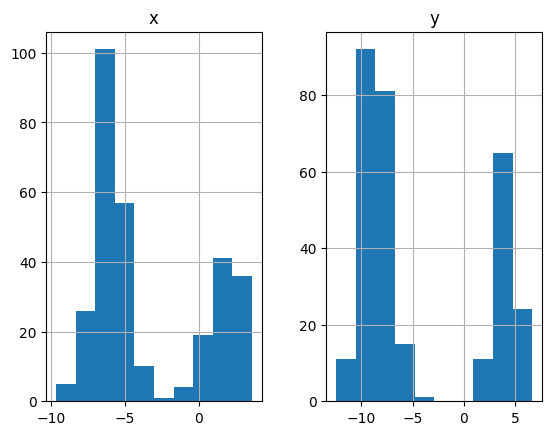

In [4]:
df.hist()
plt.show()

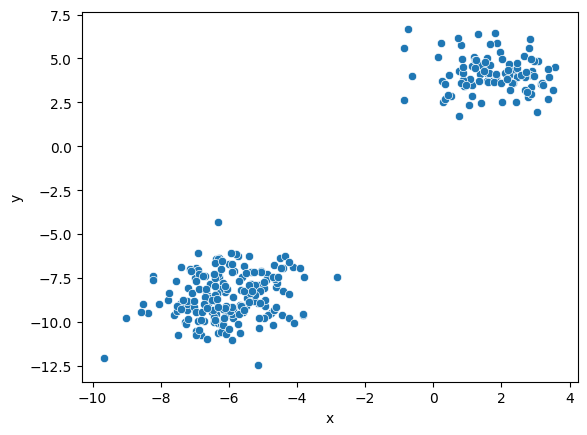

In [5]:
sns.scatterplot(data=df, x='x', y= 'y')
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled 

array([[-0.90897378, -0.42813105],
       [ 1.26384366,  1.38917041],
       [-0.30362524, -0.60421383],
       [ 1.20027255,  1.28204937],
       [-0.42914431, -0.58324088],
       [-0.64793586, -0.80794932],
       [ 1.18327882,  1.34418286],
       [-1.04682949, -1.04921327],
       [ 1.37562047,  1.76812319],
       [-0.59076986, -0.31057767],
       [-0.83478218, -0.63777185],
       [-0.73339313, -0.50810307],
       [-0.55588361, -0.83782539],
       [-1.19523997, -0.7655939 ],
       [ 1.42993717,  1.12114908],
       [ 1.72667551,  1.29141987],
       [-0.24582149, -0.64331786],
       [-0.71376044, -1.00523049],
       [-0.76536807, -0.81469002],
       [ 1.82174491,  1.23887884],
       [-0.85465568, -0.92457984],
       [ 0.97065329,  1.31922841],
       [-0.65581747, -0.86862245],
       [-0.57944433, -0.77214005],
       [ 1.4161385 ,  1.59576965],
       [-0.62894314, -0.89331498],
       [-0.62433811, -0.45541574],
       [-1.07878155, -0.86286611],
       [ 1.51571522,

In [7]:
df_scaled = pd.DataFrame(X_scaled, columns= ['x_scaled', 'y_scaled'])
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
x_scaled,300.0,-8.289665e-17,1.001671,-1.614710,-0.766207,-0.496362,1.179381,1.834988
y_scaled,300.0,-4.144833e-17,1.001671,-1.330301,-0.783692,-0.522012,1.292180,1.807417


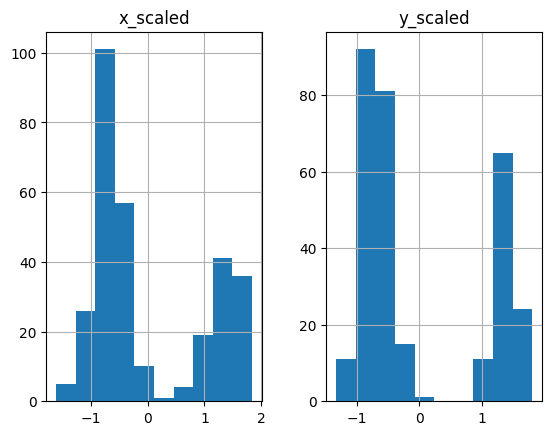

In [8]:
df_scaled.hist()
plt.show()

In [9]:
model = KMeans(n_clusters=4, random_state= 2024)
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=2024)

In [10]:
KMeans(n_clusters=4, random_state=2024)

KMeans(n_clusters=4, random_state=2024)

In [11]:
cluster = model.predict(X_scaled)
cluster

array([2, 1, 0, 1, 0, 3, 1, 3, 1, 2, 2, 2, 0, 3, 1, 1, 0, 3, 3, 1, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 0, 0, 1, 2,
       0, 3, 1, 3, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3,
       2, 1, 3, 0, 1, 1, 3, 2, 0, 1, 3, 0, 1, 2, 2, 3, 2, 0, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 3, 0, 1,
       1, 3, 2, 0, 0, 1, 1, 3, 0, 0, 1, 3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 3,
       0, 1, 0, 1, 0, 1, 0, 3, 1, 2, 0, 0, 0, 2, 0, 1, 0, 3, 1, 1, 1, 1,
       1, 3, 0, 3, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 2, 0, 2, 0, 0,
       2, 1, 3, 2, 3, 2, 1, 1, 2, 2, 3, 1, 0, 0, 3, 1, 0, 2, 0, 0, 3, 2,
       1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 3, 1, 1, 3, 0, 2, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 3, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       1, 1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1,
       3, 2, 3, 3, 0, 0, 3, 2, 1, 1, 3, 1, 2, 3], d

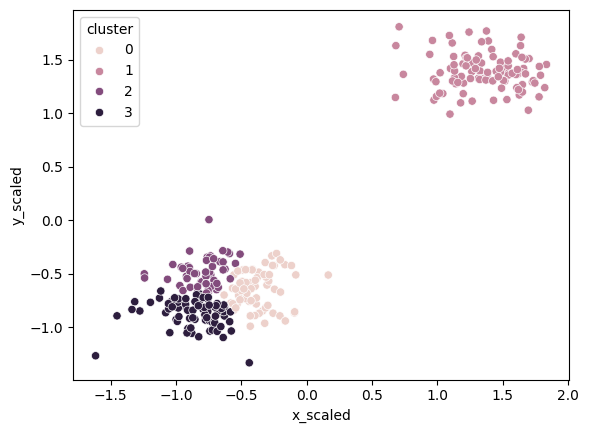

In [12]:
df_final = df_scaled.copy()
df_final['cluster'] = cluster

sns.scatterplot(data=df_final, x='x_scaled', y= 'y_scaled', hue='cluster')
plt.show()

In [13]:
X, _= load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
X.columns = X.columns.str.replace(' ','_').str.replace(r"\W",'',regex=True)
X

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


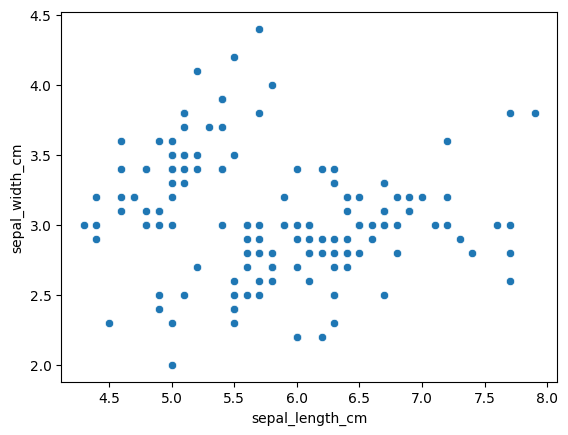

In [15]:
sns.scatterplot(data=X, x='sepal_length_cm', y= 'sepal_width_cm')
plt.show()

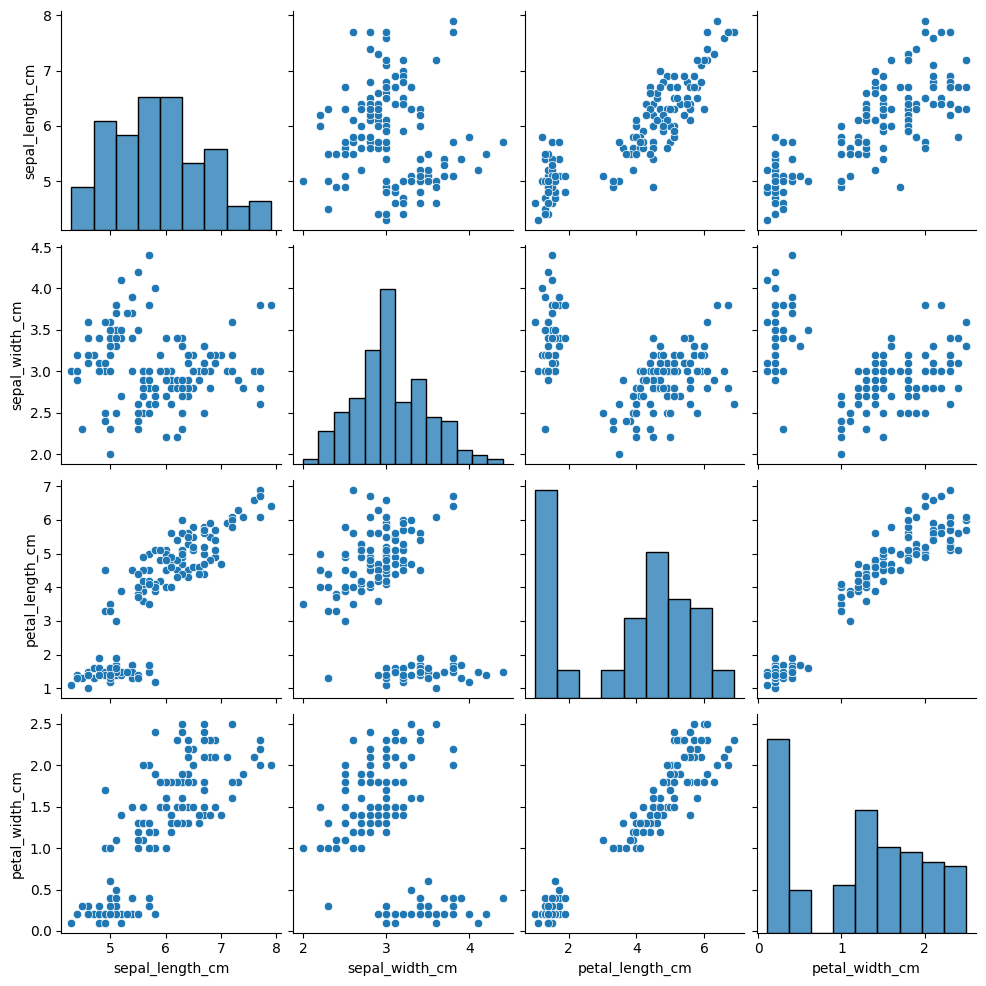

In [16]:
sns.pairplot(data=X)
plt.show()

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=['sepal_length_cm','sepal_width_cm ','petal_length_cm','petal_width_cm'])
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal_width_cm,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal_length_cm,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal_width_cm,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


In [18]:
Z = linkage(df_scaled,method= 'complete')
Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [2.90000000e+01, 1.57000000e+02, 1.70512281e-01, 3.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e

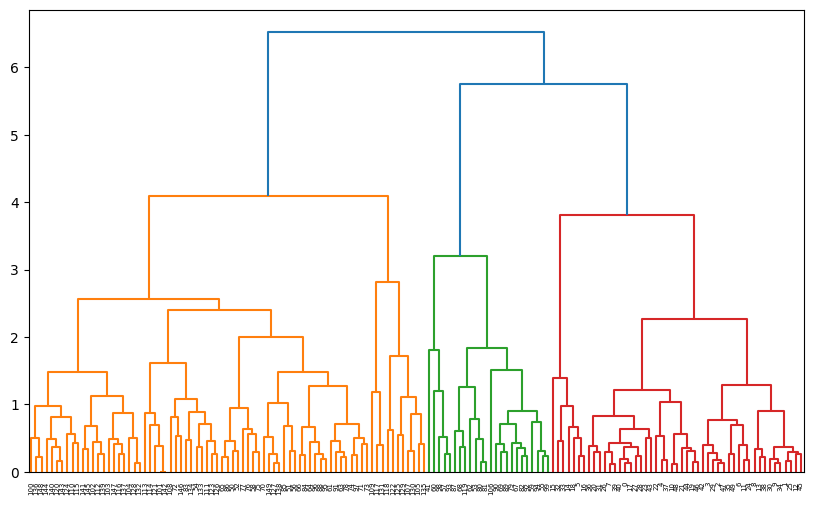

In [19]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.show()

In [20]:
X

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
X.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.117570,0.871754,0.817941
sepal_width_cm,-0.117570,1.000000,-0.428440,-0.366126
petal_length_cm,0.871754,-0.428440,1.000000,0.962865
petal_width_cm,0.817941,-0.366126,0.962865,1.000000


In [22]:
pca = PCA(n_components= 4)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

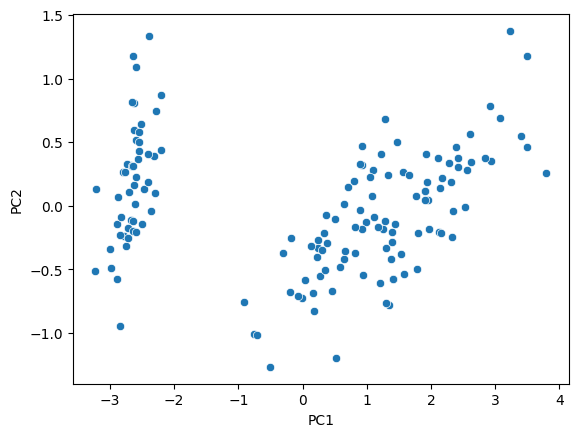

In [23]:
df_pca = pd.DataFrame(data= X_pca,columns=['PC1','PC2','PC3','PC4'])
df_pca
sns.scatterplot(data=df_pca,x='PC1', y='PC2')
plt.show()

In [24]:
pca.explained_variance_ratio_
df_pca.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,5.027752e-15,9.717970e-17,7.930338e-15
PC2,5.027752e-15,1.000000e+00,-3.028956e-14,1.513194e-14
PC3,9.717970e-17,-3.028956e-14,1.000000e+00,-1.777760e-13
PC4,7.930338e-15,1.513194e-14,-1.777760e-13,1.000000e+00


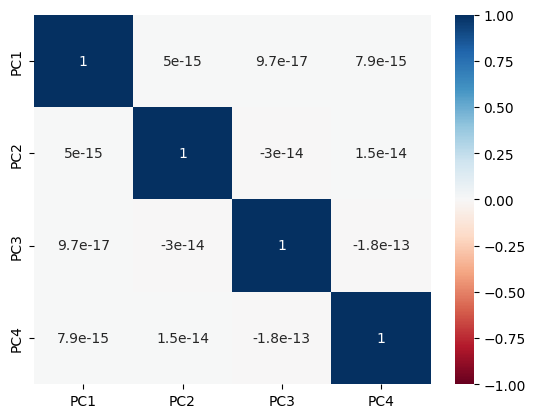

In [25]:
sns.heatmap(data=df_pca.corr(),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.show()